# 선형회귀
- 특성이 하나인 경우에 적절한 직선을 그리는 것
- 선형으로 그려진 훈련데이터 값의 연장선으로 평균회귀시킨 값으로 예측하는 것

In [114]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')

In [115]:
perch_df = df.loc[df['Species'] == 'Perch']
# perch_df

In [116]:
# 길이를 기반으로 무게를 예측 하는 것이므로
perch_length = perch_df[['Length2']]
perch_weight = perch_df[['Weight']]

In [117]:
from sklearn.model_selection import train_test_split
x_input, y_input, x_target, y_target = train_test_split(perch_length, perch_weight) # length를 기반으로 weight를 찾는다

In [118]:
# 이제 선형회귀 사용해보자
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_input, x_target)

LinearRegression()

In [119]:
lr.score(y_input, y_target)

0.9585390069613533

In [37]:
lr.predict([[100]])

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2961.11749524]])

In [46]:
lr.coef_ # ax + b 에서 ax를 담당. 계수, 가중치라고 부른다

array([[35.83507215]])

In [42]:
lr.intercept_ # ax + b 에서 b(y절편)를 담당

array([-622.38972024])

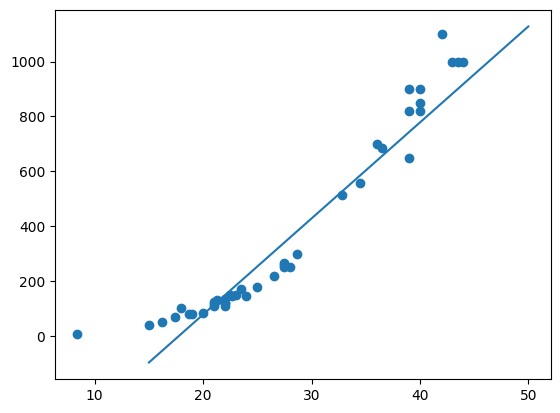

In [45]:
import matplotlib.pyplot as plt
plt.scatter(x_input, x_target)
plt.plot([15, 50], [15 * 35 - 622, 50 * 35 - 622])

In [47]:
lr.score(x_input, x_target)

0.9259851289501139

In [48]:
lr.score(y_input, y_target)

0.8939722447512892

# 다항회귀
- 곡선. 2차원
- ax^2 + bx + c (이처럼 항이 여러개라 다항회귀)
- 무게 = a * 길이^2 + b * 길이 + c

![2차원그래프예시](https://upload.wikimedia.org/wikiversity/ko/8/86/GNU_Octave_plot.png)
- 여기서 우상향 그래프만 사용

In [52]:
lr.predict([[100]]) # 이건 괜찮은데

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2961.11749524]])

In [54]:
lr.predict([[5]]) # 이건 문제가 있다.. 무게가 음수일 수는 없으므로

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[-443.21435947]])

In [58]:
# 그래서 길이의 제곱으로 된 컬럼을 하나 더 만들겟다
x_input.head() # 먼저 데이터를 보고... 그다음에,

,Length2
81,20.0
103,27.5
123,42.0
83,21.0
75,16.2


In [71]:
x_input['Length2_poly'] = x_input['Length2'] ** 2 # 컬럼을 추가 = 항을 추가
y_input['Length2_poly'] = y_input['Length2'] ** 2
x_input.head()

,Length2,Length2_poly
81,20.0,400.00
103,27.5,756.25
123,42.0,1764.00
83,21.0,441.00
75,16.2,262.44


In [61]:
lr = LinearRegression()
lr.fit(x_input, x_target)

LinearRegression()

In [62]:
lr.score(y_input, y_target)

0.93811464228588

In [66]:
lr.predict([[2, 4]]) # 컬럼이 두개가 됐으므로 예측값도 추가된 컬럼에 해당하는 값을 넣어줘야 한다

C:\Users\1-04\Desktop\DAMF2\ML\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[99.1778874]])

In [69]:
lr.coef_ # array[b, a]

array([[-22.56884943,   1.00470337]])

In [70]:
lr.intercept_ # array[c]

array([140.29677279])

# 특성공학과 규제

## 다중회귀

- 특성공학. 서로 다른 특성을 여러개를 같이 쓰는 것
<img src="https://images.velog.io/images/yesterdaykite/post/d36c44d0-dbb2-49f2-8b83-4267a6fee7df/image.png" width="350">

- ax + by + cz + d

In [99]:
import pandas as pd

df = pd.read_csv('data/Fish.csv')
perch_df = df.loc[df['Species'] == 'Perch']
perch_df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


In [82]:
perch_full = perch_df[['Length2', 'Height', 'Width']]
perch_weight = perch_df[['Weight']]

In [84]:
from sklearn.model_selection import train_test_split

x_input, y_input, x_target, y_target = train_test_split(perch_full, perch_weight)

In [98]:
# 사이킷런의 변환기를 사용하겟다
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False) # 는 1을 빼주는 것 : ax + b = a*x + b*1 (행렬의 곱 개념)
poly.fit([[3, 5]]) # 할일이 없고 의미가 없지만 개발자의 일관성(전통)을 위해 fit을 하고 transform을 하는 것으로 설계가 그냥 되어있는 것
poly.transform([[3, 5]]) # fit을 하고 score를 햇던것처럼
# 특성을 주면 특성으로 만들 수 잇는 조합을 만들어준다

array([[ 3.,  5.,  9., 15., 25.]])

- 3은 내가 넣은 3
- 5도 내가 넣은 5
- 9는 3의 제곱을 변환기가 준것
- 15는 3*5이며 변환기가 준것
- 25는 5의 제곱 등...

In [108]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(x_input) # 역할 없으나 넣어야 해서 넣은 것
x_poly = poly.transform(x_input)
x_poly[:5]

array([[  37.        ,   10.5717    ,    6.3666    , 1369.        ,
         391.1529    ,  235.5642    ,  111.76084089,   67.30578522,
          40.53359556],
       [  28.        ,    7.8204    ,    4.2042    ,  784.        ,
         218.9712    ,  117.7176    ,   61.15865616,   32.87852568,
          17.67529764],
       [  35.        ,   11.4884    ,    7.7957    , 1225.        ,
         402.094     ,  272.8495    ,  131.98333456,   89.56011988,
          60.77293849],
       [  21.        ,    5.6925    ,    3.6675    ,  441.        ,
         119.5425    ,   77.0175    ,   32.40455625,   20.87724375,
          13.45055625],
       [  40.        ,   11.73      ,    7.225     , 1600.        ,
         469.2       ,  289.        ,  137.5929    ,   84.74925   ,
          52.200625  ]])

In [109]:
x_poly.shape # 9개의 새로운 특성을 가지게 됨

(42, 9)

In [110]:
poly.get_feature_names_out() # 특성의 이름

array(['Length2', 'Height', 'Width', 'Length2^2', 'Length2 Height',
       'Length2 Width', 'Height^2', 'Height Width', 'Width^2'],
      dtype=object)

In [111]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_poly, x_target) # 특성을 기반으로 x_target(무게)를 찾는다
lr.score(x_poly, x_target)

0.9922298471506211

In [112]:
# 그리고 채점할 때도 특성이 9개가 되어야 한다
y_poly = poly.transform(y_input)
lr.score(y_poly, y_target)

0.9703461824770261

In [105]:
poly = PolynomialFeatures(degree=5, include_bias=False) # 높이의 5제곱까지도 활용해줘라는 뜻
poly.fit(x_input)
x_poly = poly.transform(x_input)
y_poly = poly.transform(y_input)
x_poly.shape

(42, 55)

In [107]:
print(lr.score(x_poly, x_target))
print(lr.score(y_poly, y_target)) # 정확도가 음수가 나움 = 컬럼이 많아진다고 항상 좋은 것은 아니다

0.9999999999942054
-2640.3802291019515
